In [52]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import cosine

In [2]:
batting = pd.read_csv('../data/war_daily_bat_eda.csv')
pitching = pd.read_csv('../data/war_daily_pitch_eda.csv')
positions = pd.read_csv('../data/majors_appearances_eda.csv')

In [3]:
mcgwire = batting[batting.name_common == 'Mark McGwire'][['year_id','g','war']]
palmeiro = batting[batting.name_common == 'Rafael Palmeiro'][['year_id','g','war']]

In [4]:
mcgwire = mcgwire.groupby('year_id').sum()
palmeiro = palmeiro.groupby('year_id').sum()

In [5]:
war_lst = []
for i in range(5):
    war_lst.append(mcgwire.war.shift(i).values)

In [6]:
mcgwire['war_lookback'] = pd.DataFrame([mcgwire.war.shift(i) for i in range(1,6)]).T.values.tolist()
palmeiro['war_lookback'] = pd.DataFrame([palmeiro.war.shift(i) for i in range(1,6)]).T.values.tolist()

In [7]:
mcgwire.loc[1997,'war_lookback']

[6.43, 5.47, 1.45, 1.5, 6.45]

In [8]:
top_score = 0
for i in range(palmeiro.shape[0]):
    if sum(pd.isnull(palmeiro.loc[palmeiro.index[i],'war_lookback']))==0:
        cos_sim = 1 - cosine(mcgwire.loc[1997,'war_lookback'],
                             palmeiro.loc[palmeiro.index[i],'war_lookback'])
        if cos_sim > top_score:
            top_score = cos_sim
            top_year = palmeiro.index[i]

print(f"Top Score: {top_score:.2f}")
print(f"Top Year: {top_year}")

Top Score: 0.94
Top Year: 2000


In [48]:
df = batting.copy()

In [49]:
# consolidate years
df = df.groupby(['name_common','year_id']).sum().reset_index()

In [50]:
# create 5-year list of lookbacks

# https://stackoverflow.com/questions/48646684/pandas-conditional-shift


df['war_lookback'] = pd.DataFrame([round(df.groupby('name_common')['war'].shift(i),2) 
                                   for i in range(1,6)]).T.values.tolist()

In [53]:
# create placeholder columns
df['top_score'] = np.nan
df['top_player'] = np.nan
df['top_year'] = np.nan

In [56]:
for i in range(100):
    
    top_score = 0
    
    # get rid of df years with nulls
    if sum(pd.isnull(df.loc[df.index[i],'war_lookback'])):
        continue
        
    # get rid of df years all zeros
    if set(df.loc[df.index[i],'war_lookback']) == {0}:
        continue
    
    for j in range(df.shape[0]):
        # ignore same player rows
        if df.loc[df.index[i],'name_common'] == df.loc[df.index[j],'name_common']:
            continue
        
        # get rid of df years with nulls
        if sum(pd.isnull(df.loc[df.index[j],'war_lookback'])):
            continue
        
        # get rid of df years all zeros
        if set(df.loc[df.index[j],'war_lookback']) == {0}:
            continue
        
        # calculate cosine-similarity
        cos_sim = 1 - cosine(df.loc[df.index[i],'war_lookback'],
                             df.loc[df.index[j],'war_lookback'])
        
        if cos_sim > top_score:
            top_score = cos_sim
            top_lst = [df.loc[df.index[j],'name_common'],
                       df.loc[df.index[j],'year_id'],
                       top_score]
    
#     print(f"Results for: {mcgwire.index[i]}")
#     print(f" Top Score: {top_lst[2]}")
#     print(f" Player: {top_lst[0]}")
#     print(f" Year: {top_lst[1]}\n")
    df.loc[df.index[i],'top_score'] = top_lst[2]
    df.loc[df.index[i],'top_player'] = top_lst[0]
    df.loc[df.index[i],'top_year'] = top_lst[1]
    print(f'{i/100:.0%}', end='\r')

In [59]:
df2 = df.copy()

In [60]:
df2[~df2['top_score'].isnull()]

,name_common,year_id,age,mlb_id,stint_id,pa,g,inn,runs_bat,runs_br,...,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,ops_plus,tob_lg,tb_lg,war_lookback,top_score,top_player,top_year
8,A.J. Burnett,2004,27.0,150359.0,1,37.0,18,120.0,-6.64,0.16,...,0.4928,0.5003,0.4935,-26.467676,9.698,12.389,"[0.06, 0.02, -0.34, 0.46, -0.11]",0.994106,Logan Kensing,2016.0
9,A.J. Burnett,2005,28.0,150359.0,1,79.0,31,209.0,-8.20,-0.68,...,0.5071,0.5004,0.4918,18.986837,23.142,28.302,"[-0.14, 0.06, 0.02, -0.34, 0.46]",0.990431,Darrel Chaney,1977.0
10,A.J. Burnett,2006,29.0,150359.0,1,3.0,1,135.7,-0.90,0.00,...,0.4568,0.5010,0.4889,-100.000000,1.020,1.313,"[0.2, -0.14, 0.06, 0.02, -0.34]",0.982533,Tom Griffin,1981.0
11,A.J. Burnett,2007,30.0,150359.0,1,2.0,1,165.7,-0.58,0.00,...,0.4709,0.5000,0.4926,-100.000000,0.677,0.847,"[-0.04, 0.2, -0.14, 0.06, 0.02]",0.988637,Steve Trachsel,2008.0
12,A.J. Burnett,2008,31.0,150359.0,1,4.0,2,221.3,-1.13,0.00,...,0.4712,0.5005,0.4924,-100.000000,0.996,1.246,"[-0.03, -0.04, 0.2, -0.14, 0.06]",0.993898,Joe Keough,1973.0
13,A.J. Burnett,2009,32.0,150359.0,1,5.0,2,207.0,-0.79,0.00,...,0.4965,0.5005,0.4906,3.963495,1.714,2.192,"[-0.06, -0.03, -0.04, 0.2, -0.14]",0.989549,Max Scherzer,2013.0
14,A.J. Burnett,2010,33.0,150359.0,1,3.0,2,186.7,-0.83,0.00,...,0.4776,0.5005,0.4941,-100.000000,0.336,0.418,"[-0.01, -0.06, -0.03, -0.04, 0.2]",0.993268,Gary Ross,1975.0
15,A.J. Burnett,2011,34.0,150359.0,1,3.0,2,190.3,-0.83,0.00,...,0.4760,0.5005,0.4941,-100.000000,0.662,0.839,"[-0.04, -0.01, -0.06, -0.03, -0.04]",0.994696,Mike Morgan,1996.0
16,A.J. Burnett,2012,35.0,150359.0,1,71.0,29,202.3,-12.04,-0.19,...,0.4915,0.5005,0.4917,-51.148949,21.113,25.484,"[-0.05, -0.04, -0.01, -0.06, -0.03]",0.986472,Jim Fairey,1973.0
17,A.J. Burnett,2013,36.0,150359.0,1,67.0,29,191.0,-12.36,0.03,...,0.4870,0.5005,0.4915,-51.584051,19.288,23.110,"[-0.25, -0.05, -0.04, -0.01, -0.06]",0.995112,Terry Adams,2002.0


In [20]:
top_score = 0
for i in range(palmeiro.shape[0]):
    if sum(pd.isnull(palmeiro.loc[palmeiro.index[i],'war_lookback'])):
        continue
    cos_sim = 1 - cosine(mcgwire.loc[1997,'war_lookback'],
                         palmeiro.loc[palmeiro.index[i],'war_lookback'])
    if cos_sim > top_score:
        top_score = cos_sim
        top_year = palmeiro.index[i]

print(f"Top Score: {top_score:.2f}")
print(f"Top Year: {top_year}")

Top Score: 0.94
Top Year: 2000


In [18]:
for i in range(6):
    if i % 2 == 0:
        continue
    print(i)

1
3
5


In [30]:
for i in range(mcgwire.shape[0]):
    print(mcgwire.index[i])

1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001


### Lookback Example
Referenced in Progress Report

In [8]:
batting.name_common

0         David Aardsma
1         David Aardsma
2         David Aardsma
3         David Aardsma
4         David Aardsma
              ...      
119662     Paul Zuvella
119663     Paul Zuvella
119678        Tony Zych
119679        Tony Zych
119680        Tony Zych
Name: name_common, Length: 65444, dtype: object

In [9]:
# select two players and get their sum of WAR by year
batting[(batting.name_common == 'Rafael Palmeiro')|
        (batting.name_common == 'Mark McGwire')]\
    .groupby(['year_id','name_common']).sum().war.unstack()

name_common,Mark McGwire,Rafael Palmeiro
year_id,,
1986,-0.20,-0.14
1987,5.13,0.67
1988,2.73,2.35
1989,3.57,2.64
1990,5.70,4.27
1991,1.55,5.75
1992,6.45,4.10
1993,1.50,6.91
1994,1.45,3.99


The above table shows the career trajectories of two players. I want to be able to compare the five-year lookback of WAR values of one player to another player.

The below graph shows Mark McGwire's 1997 season lookback (WAR for '96,'95,...,'92) against every 5-year lookback in Rafael Palmeiro's career.

I've highlighted red and purple the two most common trajectories against the blue base trajectory

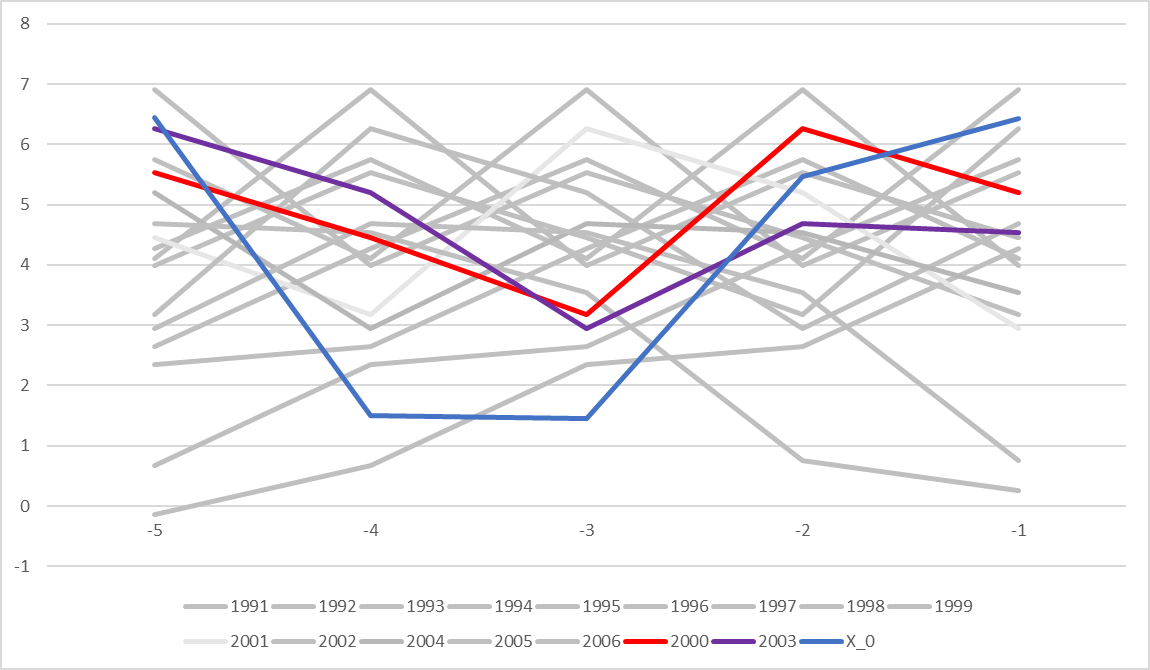

**Observation** From eyeballing alone, the two most lookback windows for Mark McGwire's 1997 season are Rafael Palmeiro's 2000 and 2003 seasons.